# Physics-aware Event Data Modeling with Awkward Arrays and Vector

| Library               | Purpose                                                                                                   |
| --------------------- | --------------------------------------------------------------------------------------------------------- |
| **uproot**            | Reads ROOT files into Python. Returns Awkward arrays for HEP event data.                                  |
| **matplotlib.pyplot** | For plotting histograms or scatter plots of physics quantities.                                           |
| **numpy**             | Numerical library for general computations (still used internally by Awkward).                            |
| **awkward**           | Handles irregular, nested event data; the backbone of HEP columnar analysis.                              |
| **vector**            | Adds physical meaning to data: momentum 3-vectors and Lorentz 4-vectors with built-in physics operations. |


In [ ]:
import uproot as ur
import matplotlib.pyplot as plt
import numpy as np
import awkward as ak
import vector

- Open the ROOT file
- Access the event tree
- Identify relevant branches
- Load branches into an Awkward Array
- Extract momentum components and energy

In [2]:
file =  ur.open('../pythia8NCDIS_18x275_minQ2=10_beamEffects_xAngle=-0.025_hiDiv_5.2623.eicrecon.edm4eic.root')
tree = file['events']
trackVars = list(filter(lambda x: ('ReconstructedChargedParticles' in x) and (not x.startswith('_')), tree.keys()))
df = tree.arrays(trackVars, library = 'ak')

_px = df['ReconstructedChargedParticles/ReconstructedChargedParticles.momentum.x']
_py = df['ReconstructedChargedParticles/ReconstructedChargedParticles.momentum.y']
_pz = df['ReconstructedChargedParticles/ReconstructedChargedParticles.momentum.z']
_E = df['ReconstructedChargedParticles/ReconstructedChargedParticles.energy']

- Import the built-in “behavior” dictionary
- Combine the 4 components into structured 4-vectors
- How behaviors work under the hood

In [ ]:
# keep the vector in the format [{px: , py: , pz: , E: }, ...]
behavior = vector.backends.awkward.behavior

vec = ak.zip(
    {"px":_px,"py":_py,"pz":_pz, "E": _E },
    with_name="Momentum4D",
    behavior=behavior,
)


<Array [[0.337, 2.37, ..., 0.626, 0.581], ...] type='380 * var * float32'>

Some of the built-in Behavior Attributes from the `vector` Library for `Momentum4D` Objects:
- `vec.pt`     # transverse momentum = sqrt(px² + py²)
- `vec.eta`    # pseudorapidity
- `vec.phi`    # azimuthal angle
- `vec.mass`   # invariant mass from E, px, py, pz
- `vec.rho`    # spatial magnitude = sqrt(px² + py² + pz²)

In [5]:
vec.pt

<Array [[0.337, 2.37, ..., 0.626, 0.581], ...] type='380 * var * float32'>

In [6]:
vec.rho

<Array [[0.337, 2.37, ..., 0.626, 0.581], ...] type='380 * var * float32'>

In [7]:
vec.mass

<Array [[0.14, 0.14, 0.14, ..., 0.14, 0.14], ...] type='380 * var * float32'>

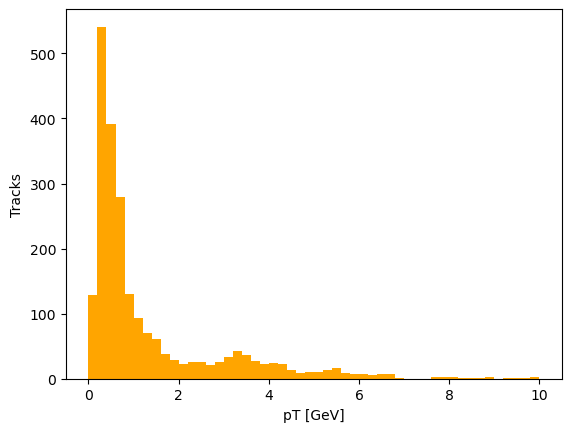

In [9]:
# Transverse momentum distribution
plt.hist(ak.flatten(vec.pt), bins=50, range=(0,10), color='orange')
plt.xlabel("pT [GeV]")
plt.ylabel("Tracks")
plt.show()